
# <span style="color:rgb(213,80,0)">URI machine learning benchmark</span>

One of the experiments in the CLASSIX paper [1] compares several clustering algorithms on the URI machine learning repository [2]. The Python code that generated these results, together with all the used hyperparameters, is available in the CLASSIX GitHub repository: [https://github.com/nla-group/classix/blob/master/exp/run_real_world.py](https://github.com/nla-group/classix/blob/master/exp/run_real_world.py)


Let's reproduce the column "CLASSIX (distance)" in Table 2 of [1]. Instead of using Python, we'll use the MATLAB implementation of CLASSIX.


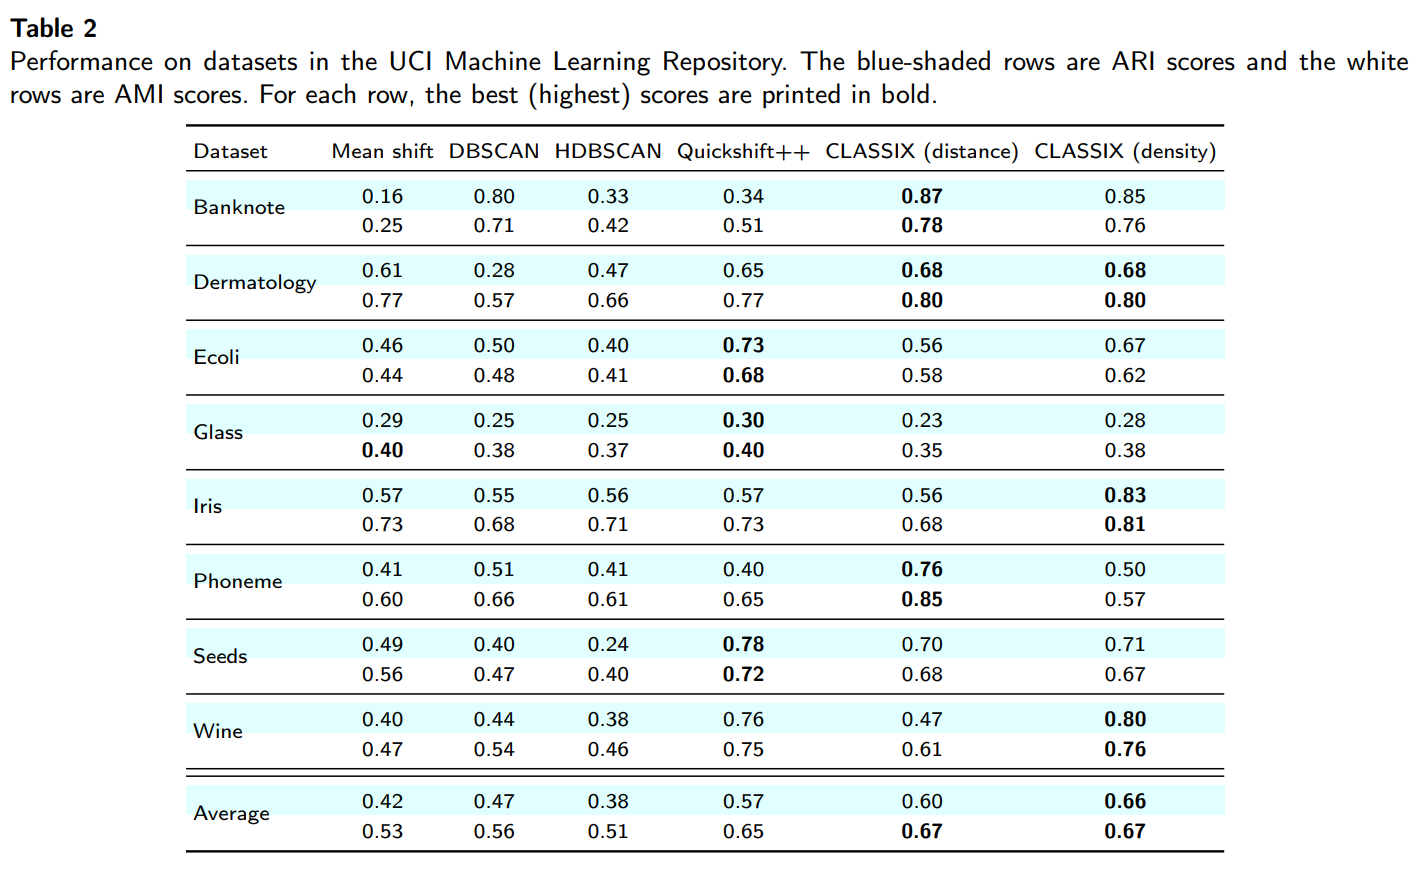


First, we create a function handle to compute the adjusted Rand index (ARI).


In [1]:
addpath ..
ari = @(a,b) rand_index(double(a),double(b),'adjusted');


Now we run each of the datasets, using as parameters the ones used in the CLASSIX paper.


In [2]:
load('../data/Banknote.mat')
data = (data - mean(data))./std(data); % z-normalization
tic
label = classix(data,0.21,41);
fprintf('Banknote runtime: %5.3f seconds - classes: %d - ARI: %3.2f\n',...
    toc, length(unique(label)), ari(labels,label))

Banknote runtime: 0.028 seconds - classes: 2 - ARI: 0.87

In [3]:
load('../data/Dermatology.mat')
ind = find(~isnan(sum(data,2))); % data has 8 rows with NaN's
data = data(ind,:); labels = labels(ind); % remove then
data = (data - mean(data))./std(data); % z-normalization
tic
label = classix(data,0.4,4);
fprintf('Dermatology runtime: %5.3f seconds - classes: %d - ARI: %3.2f\n',...
    toc, length(unique(label)), ari(labels,label))

Dermatology runtime: 0.027 seconds - classes: 7 - ARI: 0.68

In [4]:
load('../data/Ecoli.mat')
data = (data - mean(data))./std(data); % z-normalization
tic
label = classix(data,0.3,4);
fprintf('Ecoli runtime: %5.3f seconds - classes: %d - ARI: %3.2f\n',...
    toc, length(unique(label)), ari(labels,label))

Ecoli runtime: 0.013 seconds - classes: 7 - ARI: 0.56

In [5]:
load('../data/Glass.mat')
data = (data - mean(data))./std(data); % z-normalization
tic
label = classix(data,0.725,1);
fprintf('Glass runtime: %5.3f seconds - classes: %d - ARI: %3.2f\n',...
    toc, length(unique(label)), ari(labels,label))

Glass runtime: 0.011 seconds - classes: 26 - ARI: 0.23

In [6]:
load('../data/Iris.mat')
data = (data - mean(data))./std(data); % z-normalization
tic
label = classix(data,0.225,4);
fprintf('Iris runtime: %5.3f seconds - classes: %d - ARI: %3.2f\n',...
    toc, length(unique(label)), ari(labels,label))

Iris runtime: 0.008 seconds - classes: 4 - ARI: 0.56

In [7]:
load('../data/Phoneme.mat')
data = (data - mean(data))./std(data); % z-normalization
tic
label = classix(data,0.445,8);
fprintf('Phoneme runtime: %5.3f seconds - classes: %d - ARI: %3.2f\n',...
    toc, length(unique(label)), ari(labels,label))

Phoneme runtime: 2.860 seconds - classes: 4 - ARI: 0.76

In [8]:
load('../data/Seeds.mat')
data = (data - mean(data))./std(data); % z-normalization
tic
label = classix(data,0.15,9);
fprintf('Seeds runtime: %5.3f seconds - classes: %d - ARI: %3.2f\n',...
    toc, length(unique(label)), ari(labels,label))

Seeds runtime: 0.017 seconds - classes: 3 - ARI: 0.70

In [9]:
load('../data/Wine.mat')
data = (data - mean(data))./std(data); % z-normalization
tic
label = classix(data,0.425,4);
fprintf('Wine runtime: %5.3f seconds - classes: %d - ARI: %3.2f\n',...
    toc, length(unique(label)), ari(labels,label))

Wine runtime: 0.017 seconds - classes: 2 - ARI: 0.47


The results are in agreement with the paper, giving us confidence that the MATLAB implementation is equivalent to the Python one. Almost all clusterings were run in just a couple of milliseconds. Only the Phoneme dataset is slightly harder.

## Learn more about CLASSIX?

CLASSIX is a fast and memory-efficient clustering algorithm which produces explainable results. If you'd like to learn more, here are a couple of online resources:

-  arXiv paper: [https://arxiv.org/abs/2202.01456](https://arxiv.org/abs/2202.01456)
-  Python code: [https://github.com/nla-group/classix](https://github.com/nla-group/classix)
-  MATLAB code: [https://github.com/nla-group/classix-matlab/](https://github.com/nla-group/classix-matlab/)
-  YouTube video: [https://www.youtube.com/watch?v=K94zgRjFEYo](https://www.youtube.com/watch?v=K94zgRjFEYo)
## References

[1] X. Chen and S. Güttel. "Fast and explainable clustering based on sorting." arXiv: [https://arxiv.org/abs/2202.01456](https://arxiv.org/abs/2202.01456), 2022.


[2] D. Dua and C. Graff. "UCI machine learning repository." URL: [http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml), 2017.

